In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [71]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2017-12-01'
END_DATE = '2022-10-31'

In [72]:
df = yf.download([RISKY_ASSET,MARKET_BENCHMARK],START_DATE,END_DATE,progress = False,adjusted = True)

In [73]:
df

Adj Close                    Close                     High  \
                  AMZN        ^GSPC        AMZN        ^GSPC        AMZN   
Date                                                                       
2017-12-01   58.117500  2642.219971   58.117500  2642.219971   58.982498   
2017-12-04   56.697498  2639.439941   56.697498  2639.439941   58.759998   
2017-12-05   57.078499  2629.570068   57.078499  2629.570068   57.963501   
2017-12-06   57.617500  2629.270020   57.617500  2629.270020   57.794498   
2017-12-07   57.989498  2636.979980   57.989498  2636.979980   58.159500   
...                ...          ...         ...          ...         ...   
2022-10-24  119.820000  3797.340088  119.820000  3797.340088  120.389999   
2022-10-25  120.599998  3859.110107  120.599998  3859.110107  121.320000   
2022-10-26  115.660004  3830.600098  115.660004  3830.600098  119.349998   
2022-10-27  110.959999  3807.300049  110.959999  3807.300049  114.120003   
2022-10-28  103.410004  3901.060059  103.410004  3901.060059  103.959999   

                                Low                     Open               \
                  ^GSPC        AMZN        ^GSPC        AMZN        ^GSPC   
Date                                                                        
2017-12-01  2650.620117   57.599998  2605.520020   58.602501  2645.100098   
2017-12-04  2665.189941   56.400002  2639.030029   58.692501  2657.189941   
2017-12-05  2648.719971   56.237000  2627.729980   56.412998  2639.780029   
2017-12-06  2634.409912   56.804001  2624.750000   56.899502  2626.239990   
2017-12-07  2640.989990   57.549999  2626.530029   57.829498  2628.379883   
...                 ...         ...          ...         ...          ...   
2022-10-24  3810.739990  116.570000  3741.649902  119.980003  3762.010010   
2022-10-25  3862.850098  118.949997  3799.439941  119.650002  3799.439941   
2022-10-26  3886.149902  114.760002  3824.070068  116.000000  3825.969971   
2022-10-27  3859.949951  109.769997  3803.790039  113.919998  3834.689941   
2022-10-28  3905.419922   97.660004  3808.260010   97.910004  3808.260010   

               Volume              
                 AMZN       ^GSPC  
Date                               
2017-12-01   82142000  3942320000  
2017-12-04  118638000  4023150000  
2017-12-05   81596000  3539040000  
2017-12-06   57066000  3229000000  
2017-12-07   50232000  3292400000  
...               ...         ...  
2022-10-24   49531500  4747930000  
2022-10-25   50934600  4843120000  
2022-10-26   68802300  4817310000  
2022-10-27  129605400  4687320000  
2022-10-28  223133400  4459410000  

[1236 rows x 12 columns]

In [74]:
X = df['Adj Close'].rename(columns = {RISKY_ASSET : 'asset_return', MARKET_BENCHMARK : 'market_return'}).resample('MS').last().pct_change().dropna()

In [75]:
X

,asset_return,market_return
Date,,
2018-01-01,0.240639,0.056179
2018-02-01,0.042429,-0.038947
2018-03-01,-0.043049,-0.026884
2018-04-01,0.082075,0.002719
2018-05-01,0.040539,0.021608
2018-06-01,0.043065,0.004842
2018-07-01,0.045676,0.036022
2018-08-01,0.132364,0.030263
2018-09-01,-0.004824,0.004294


In [76]:
import pandas_datareader.data as web

In [77]:
rfree = web.DataReader('TB3MS','fred',start='2018-01-01',end=END_DATE)

In [78]:
rf = (1 + (rfree/100))** (1/12) - 1

<AxesSubplot: title={'center': 'Risk-free rate (3-Month Treasury Bill)'}, xlabel='DATE'>

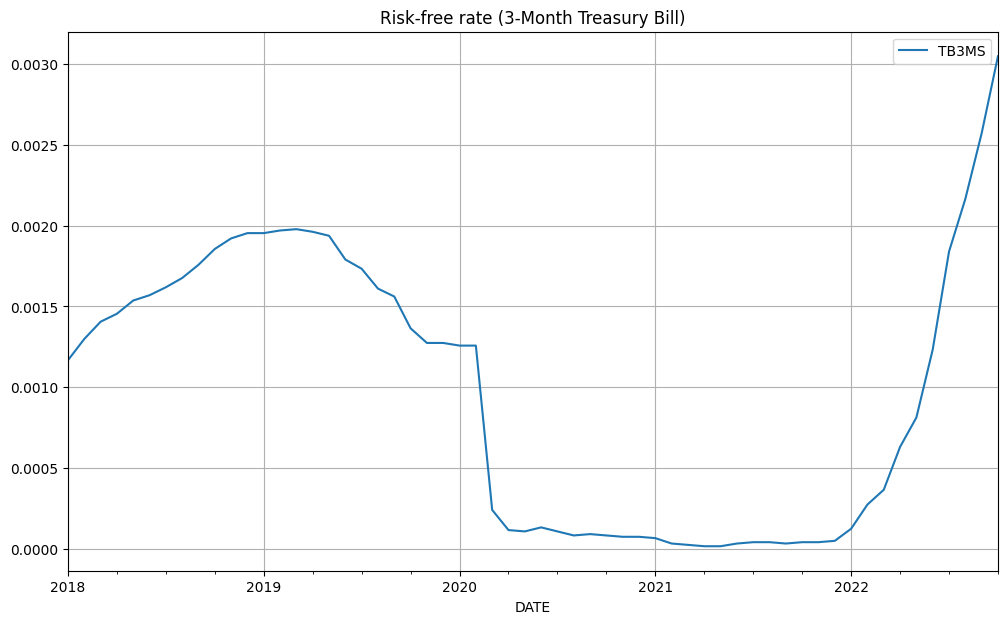

In [79]:
rf.plot(title='Risk-free rate (3-Month Treasury Bill)',figsize=(12,7),grid=True)

In [80]:
df_premium = X.assign(TB3MS = rf['TB3MS'],asset_premium=X['asset_return']-rf['TB3MS'],market_premium=X['market_return']-rf['TB3MS'])

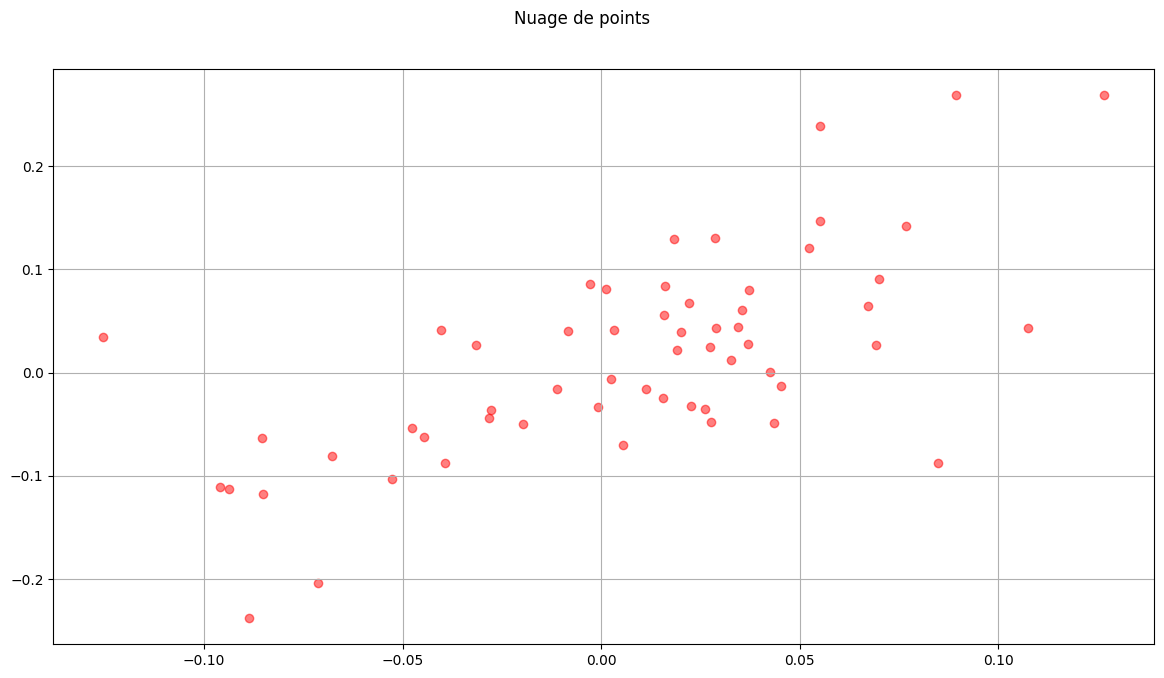

In [81]:
x = df_premium['market_premium']
y = df_premium['asset_premium']
fig , ax = plt.subplots(figsize=(12,7))
ax.scatter(x,y,alpha=0.5,color='red')
fig.suptitle('Nuage de points')
fig.tight_layout(pad=2)
ax.grid(True)
fig.savefig('nuage.png',dpi=125)

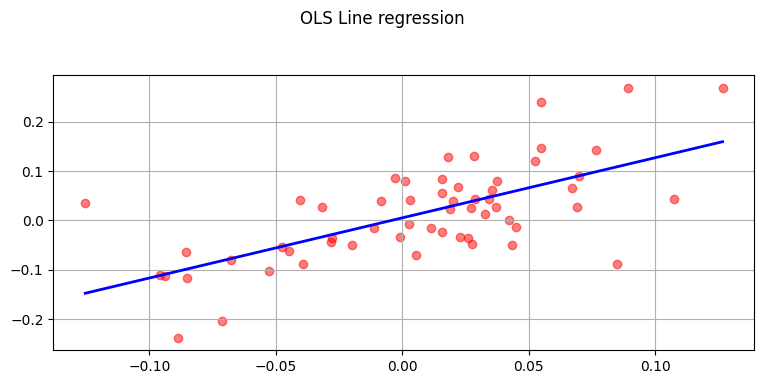

In [82]:
max_x = df_premium['market_premium'].max()
min_x = df_premium['market_premium'].min()
fig , ax  = plt.subplots(figsize=(8,4))
ax.scatter(x,y,alpha=0.5,color='red')

x = sm.add_constant(x)

model = sm.OLS(y,x)
fitted = model.fit()

n_obs = len(x)
x_pred = np.linspace(min_x,max_x,n_obs)

x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)

#ax1.plot(x_pred,y_pred,alpha=0.5,color='blue')
fig.suptitle('OLS Line regression')
fig.tight_layout(pad=2)
ax.grid(True)
ax.plot(x_pred,y_pred,'-',color='blue',linewidth=2)

fig.savefig('regression_line.png',dpi=125)

In [83]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          asset_premium   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     45.97
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.99e-09
Time:                        17:05:25   Log-Likelihood:                 70.155
No. Observations:                  58   AIC:                            -136.3
Df Residuals:                      56   BIC:                            -132.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0050      0.010      0.

In [67]:
y_hat = fitted.predict(x)
x = df_premium['market_premium']
y_err = y - y_hat

mean_x = x.T[1].mean()
dof = n_obs - fitted.df_model - 1
from scipy import stats

t = stats.t.ppf(1-0.025,df=dof)
s_err = np.sum(np.power(y_err,2))
conf = t * np.sqrt((s_err/(n_obs-2))*(1/n_obs + (np.power((x_pred-mean_x),2)/((np.sum(np.power(x_pred,2))) - n_obs*(np.power(mean_x,2))))))

conf_pred = t * np.sqrt((s_err/(n_obs-2)))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)

upper_pred = y_pred + abs(conf_pred)
lower_pred = y_pred - abs(conf_pred)


In [68]:
fig.suptitle('Confidence interval for the regression')
ax.plot(x_pred,lower,'-.',color='r',linewidth=0.5)
ax.plot(x_pred,upper,'-.',color='r',linewidth=0.5)

ax.fill_between(x_pred,lower,upper,color='#888888',alpha = 1)

fig.savefig('Confidence_interval_reg.png',dpi=125)

In [70]:
fig.suptitle('Confidence interval for the prediction and regression')
ax.plot(x_pred,lower_pred,'-.',color='r',linewidth=0.5)
ax.plot(x_pred,upper_pred,'-.',color='r',linewidth=0.5)

ax.fill_between(x_pred,lower_pred,upper_pred,color='#888888',alpha = 0.4)

fig.savefig('Confidence_interval_pred_reg.png',dpi=125)